## Sampling 
#### What is sampling?
Given a probability distribution, how do you obtain samples? For example how do you write a program to generate samples from a exponential distribution. 



#### Why is this important?
Example you are trying to generate an image. Now we consider the image as a sample generated from the probability distribution. So if we know the distribution, we could generate the images using sampling.

Or for generating new samples in particle filter. 

In generative adverserial network, I think we just estimate a function mapping from uniform distribution to let's say image distribution. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Rejection Sampling 
So given the PDF of distribution, we want to generate samples. One way to do it is Rejection sampling. 

Basically we draw a rectangle around distribution and generate uniform samples. We reject those, which are above the PDF curve. 

This would be more clear with some visualisations. 

##### Aim : To take samples from exponential distribution. 
p(x) = a * e^-(a * x) 

Let's say our a = 0.5

Let's plot this curve. 

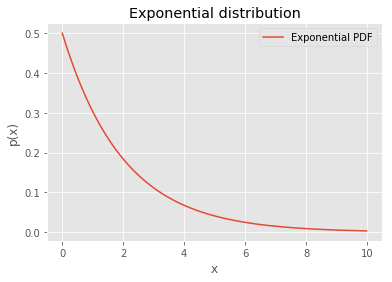

In [19]:
a = 0.5
x = np.arange(0, 10, 0.01)
f = lambda x : a * np.exp(-a*x)
y = f(x)
plt.style.use('ggplot')
plt.plot(x, y, label= 'Exponential PDF')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.title('Exponential distribution')
plt.show()

We only drew the curver till x = 10, we can't go till infinity lol. 

Now we asume that we can take samples from uniform samples distribution. 

So We will take samples X and Y from uniform distribution. 

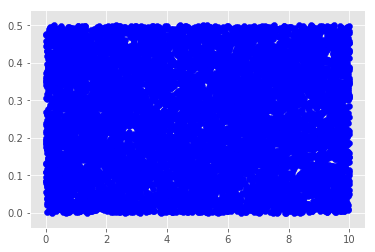

In [44]:
sample_size = 10000
X = np.random.uniform(0, 10, sample_size)
Y = np.random.uniform(0, a, sample_size)
plt.scatter(X, Y, c='b')

Now that we have X and Y, we will classify them according to our PDF. Anything that is above the PDF curve is rejected(red) and anything that is below the curve is accepted(green).

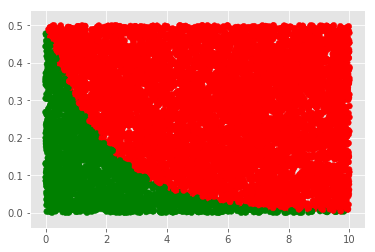

In [45]:
C = np.where(Y - f(X) <=0, 'g', 'r')
plt.scatter(X, Y, c=C)

So everytime we get a red sample, we reject it and computer again, until we get a green. 

In [62]:
import random
def exp_sampling():
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    while y > f(x): 
        x = random.uniform(0, 10)
        y = random.uniform(0, 10)
    
    return x 

(30,)


<BarContainer object of 30 artists>

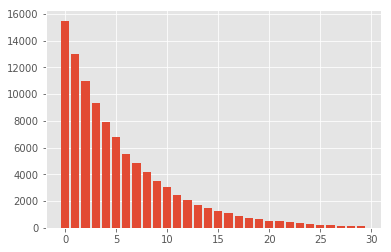

In [73]:
samples = []
for i in range(100000): 
    samples.append(exp_sampling())
samples = np.asarray(samples)
hist = np.histogram(samples, 30)[0]
print(hist.shape)
plt.bar(np.arange(30), hist)